### 1. Importing Required Libraries


In [378]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")



### 2. Loading the Dataset


In [379]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head(4)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up


### 3. Understanding the Dataset Structure


In [380]:
df_copy=df.copy()
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [381]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [382]:
df_copy.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [383]:
df_copy.shape

(10841, 13)

In [384]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [385]:
df_copy.isnull().sum().sum()

np.int64(1487)

### 4. Data Cleaning and Preprocessing


In [386]:
df_copy['Reviews'].unique() # it contains int values but still data type is object

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [387]:
df_copy['Reviews'].dtype

dtype('O')

In [388]:
df_copy['Reviews'].str.isnumeric().sum()

np.int64(10840)

In [389]:
df_copy[~df_copy['Reviews'].str.isnumeric()] # data where review is not numeric

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [390]:
df_copy=df_copy.drop(df_copy.index[10472])
df_copy[~df_copy['Reviews'].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [391]:
df_copy['Reviews']=df_copy['Reviews'].astype(int)


In [392]:
df_copy['Reviews'].dtype # checking the datatype of 'Reviews'

dtype('int64')

In [393]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [394]:
df_copy['Size'].str.replace('k','')

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10840, dtype: object

In [395]:
df_copy['Size_in_kb']=df_copy['Size']
df_copy['Size_in_kb']=df_copy['Size_in_kb'].str.replace('M','000')
df_copy['Size_in_kb']=df_copy['Size_in_kb'].str.replace('k','')
df_copy['Size_in_kb']=df_copy['Size_in_kb'].replace('Varies with device',np.nan)
df_copy['Size_in_kb']=df_copy['Size_in_kb'].astype(float)

In [396]:
df_copy['Size_in_kb']

0        19000.0
1        14000.0
2            8.7
3        25000.0
4            2.8
          ...   
10836    53000.0
10837        3.6
10838        9.5
10839        NaN
10840    19000.0
Name: Size_in_kb, Length: 10840, dtype: float64

In [397]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
 13  Size_in_kb      9145 non-null   float64
dtypes: float64(2), int64(1), object(11)
memory usage: 1.2+ MB


In [398]:
import seaborn as sns
sns.histplot(df_copy['Size_in_kb'],kde=True)

<Axes: xlabel='Size_in_kb', ylabel='Count'>

In [399]:
df_copy['Size_in_kb']=df_copy['Size_in_kb'].fillna(df_copy['Size_in_kb'].median())

In [400]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size_in_kb           0
dtype: int64

In [401]:
df_copy['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [402]:
df_copy['Type']=df_copy['Type'].fillna(df_copy['Type'].mode()[0])

In [403]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
Size_in_kb           0
dtype: int64

In [404]:
df_copy['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [405]:
df_copy['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [406]:
df_copy['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [407]:
chars_to_remove=['+',',','$']
cols_to_clean=['Installs','Price']
for item in chars_to_remove:
    for cols in cols_to_clean:
        df_copy[cols]=df_copy[cols].str.replace(item,'')

In [408]:
df_copy['Installs']=df_copy['Installs'].astype('int')
df_copy['Price']=df_copy['Price'].astype('float')

In [409]:
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])
df_copy['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10840, dtype: datetime64[ns]

In [410]:
df_copy['year']=df_copy['Last Updated'].dt.year
df_copy['month']=df_copy['Last Updated'].dt.month
df_copy['day']=df_copy['Last Updated'].dt.day

df_copy['month_name']=df_copy['Last Updated'].dt.month_name()
df_copy['day_name']=df_copy['Last Updated'].dt.day_name()

In [411]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            10840 non-null  object        
 5   Installs        10840 non-null  int64         
 6   Type            10840 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  Size_in_kb      10840 non-null  float64       
 14  year            10840 non-null  int32         
 15  month  

In [412]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_kb,year,month,day,month_name,day_name
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19000.0,2018,1,7,January,Sunday
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14000.0,2018,1,15,January,Monday


### 5.EDA

In [413]:
df_copy.shape

(10840, 19)

In [414]:
df_copy.duplicated().sum()

np.int64(483)

In [415]:
df_copy['App']

0           Photo Editor & Candy Camera & Grid & ScrapBook
1                                      Coloring book moana
2        U Launcher Lite – FREE Live Cool Themes, Hide ...
3                                    Sketch - Draw & Paint
4                    Pixel Draw - Number Art Coloring Book
                               ...                        
10836                                     Sya9a Maroc - FR
10837                     Fr. Mike Schmitz Audio Teachings
10838                               Parkinson Exercices FR
10839                        The SCP Foundation DB fr nn5n
10840        iHoroscope - 2018 Daily Horoscope & Astrology
Name: App, Length: 10840, dtype: object

In [416]:
df_copy=df_copy.drop_duplicates(subset='App',keep='first') # we did this because this is playstores data and eachrow= one app so if there are multiple rows of same app then that is duplicate record

In [417]:
df_copy.shape

(9659, 19)

In [418]:
df_copy.dtypes=='O'

App                True
Category           True
Rating            False
Reviews           False
Size               True
Installs          False
Type               True
Price             False
Content Rating     True
Genres             True
Last Updated      False
Current Ver        True
Android Ver        True
Size_in_kb        False
year              False
month             False
day               False
month_name         True
day_name           True
dtype: bool

In [419]:
l1=[i for i in df_copy.columns if df_copy[i].dtype=='O']
l1

['App',
 'Category',
 'Size',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver',
 'month_name',
 'day_name']

In [420]:
numericals_cols=[i for i in df_copy.columns if df_copy[i].dtype!='O']
categorical_cols=[i for i in df_copy.columns if df_copy[i].dtype=='O']

# print columns
print(f'We have {len(numericals_cols)} numerical features : {numericals_cols} ')
print(f'\nWe have {len(categorical_cols)} categorical features : {categorical_cols}')

We have 9 numerical features : ['Rating', 'Reviews', 'Installs', 'Price', 'Last Updated', 'Size_in_kb', 'year', 'month', 'day'] 

We have 10 categorical features : ['App', 'Category', 'Size', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver', 'month_name', 'day_name']


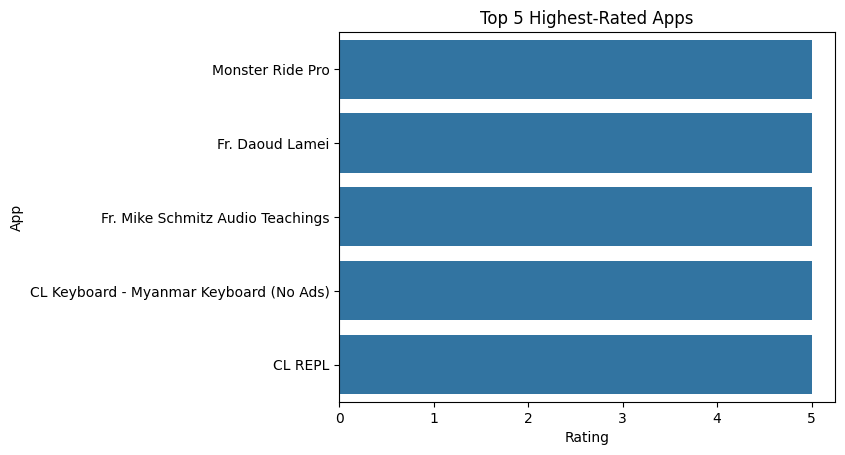

In [438]:
apps_with_rating = df_copy[['App', 'Rating']].sort_values(by='Rating', ascending=False).head(5)
sns.barplot(x='Rating', y='App', data=apps_with_rating)
plt.title('Top 5 Highest-Rated Apps')
plt.show()


In [422]:
type(numericals_cols)

list

In [423]:
len(numericals_cols)

9

In [424]:
numericals_cols

['Rating',
 'Reviews',
 'Installs',
 'Price',
 'Last Updated',
 'Size_in_kb',
 'year',
 'month',
 'day']

In [425]:
for position, col_name in enumerate(numericals_cols, start=1):
    print(col_name, position)

Rating 1
Reviews 2
Installs 3
Price 4
Last Updated 5
Size_in_kb 6
year 7
month 8
day 9


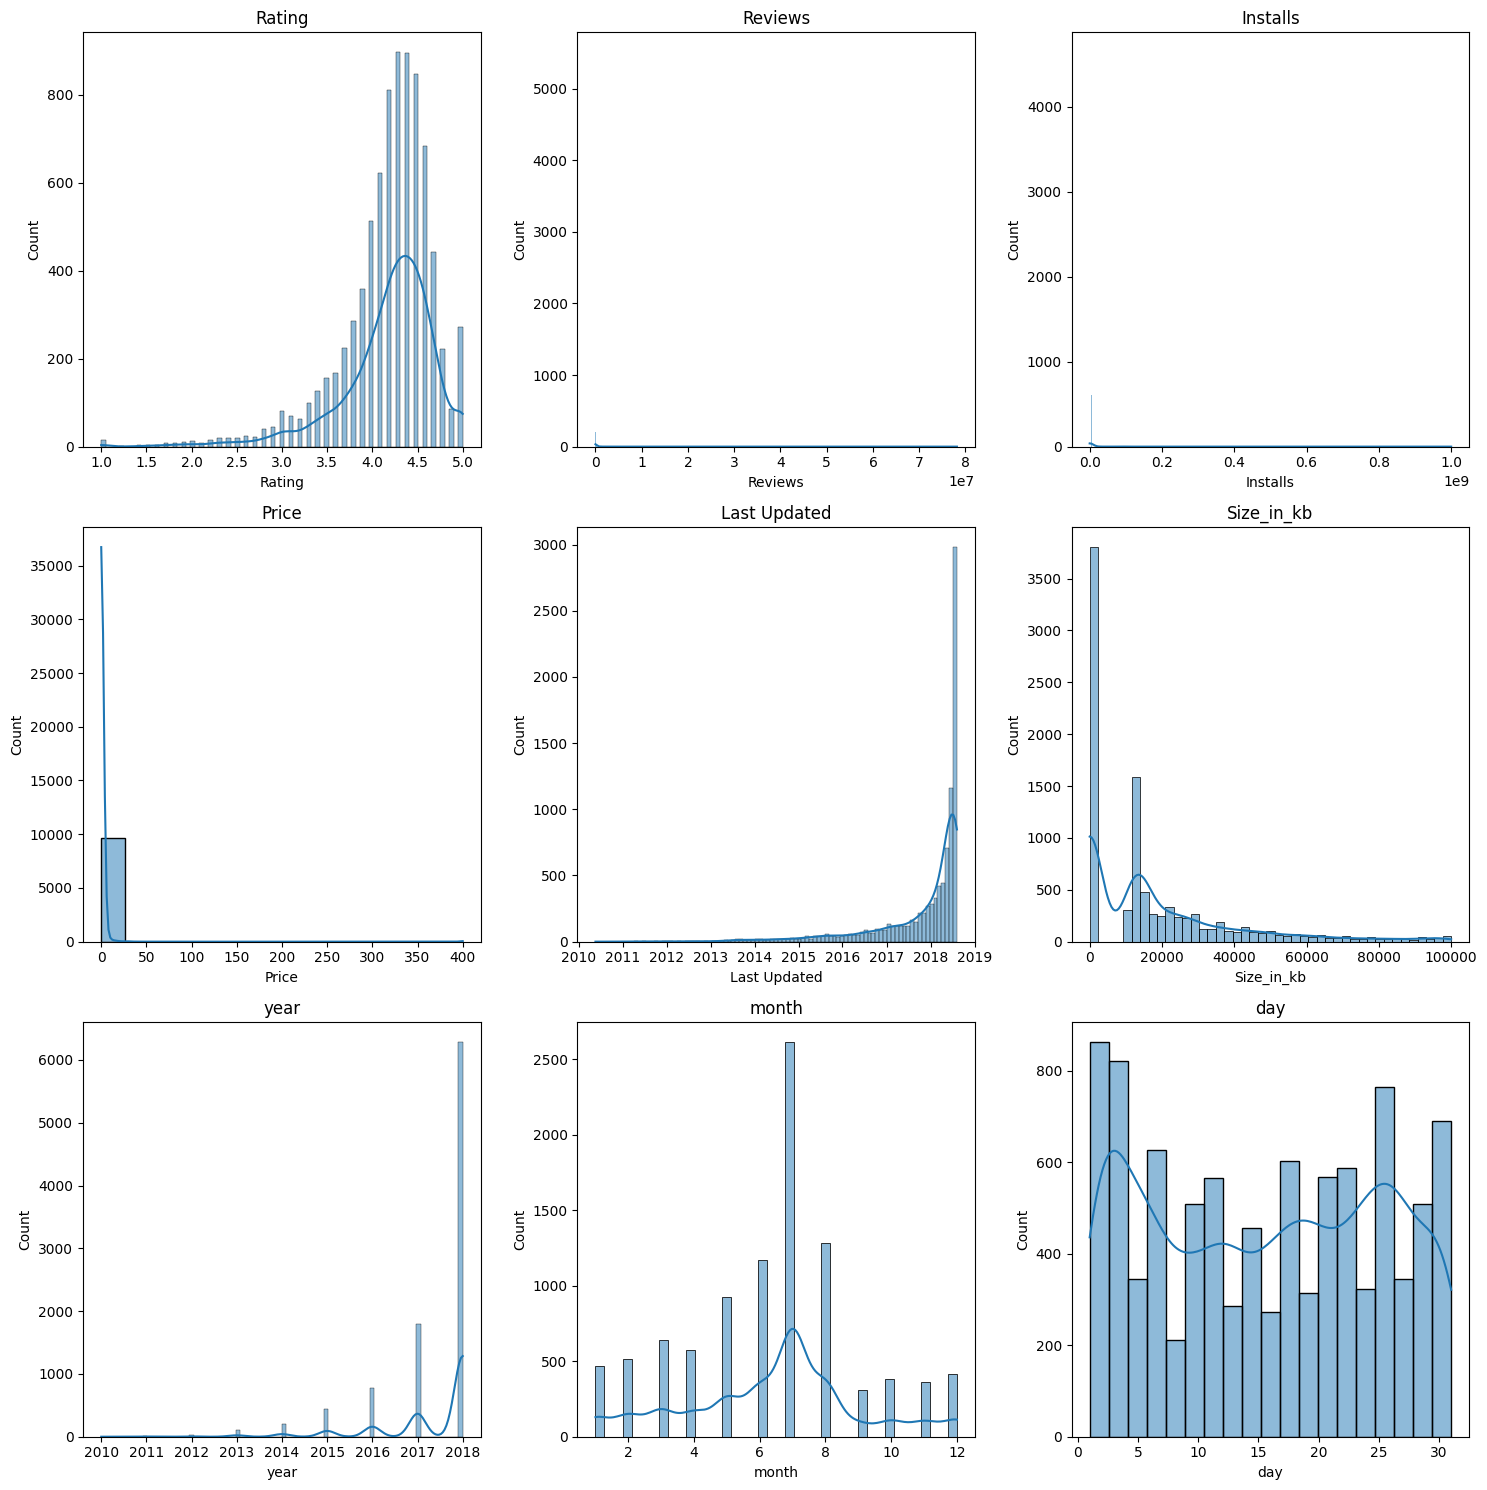

In [426]:
plt.figure(figsize=(15,15))

def plotting(col_name, position):
    plt.subplot(3, 3, position)
    sns.histplot(data=df_copy, x=col_name, kde=True)
    plt.title(col_name)

for position, col_name in enumerate(numericals_cols, start=1):
    plotting(col_name, position)

plt.tight_layout()
plt.show()


In [427]:
categorical_cols

['App',
 'Category',
 'Size',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver',
 'month_name',
 'day_name']

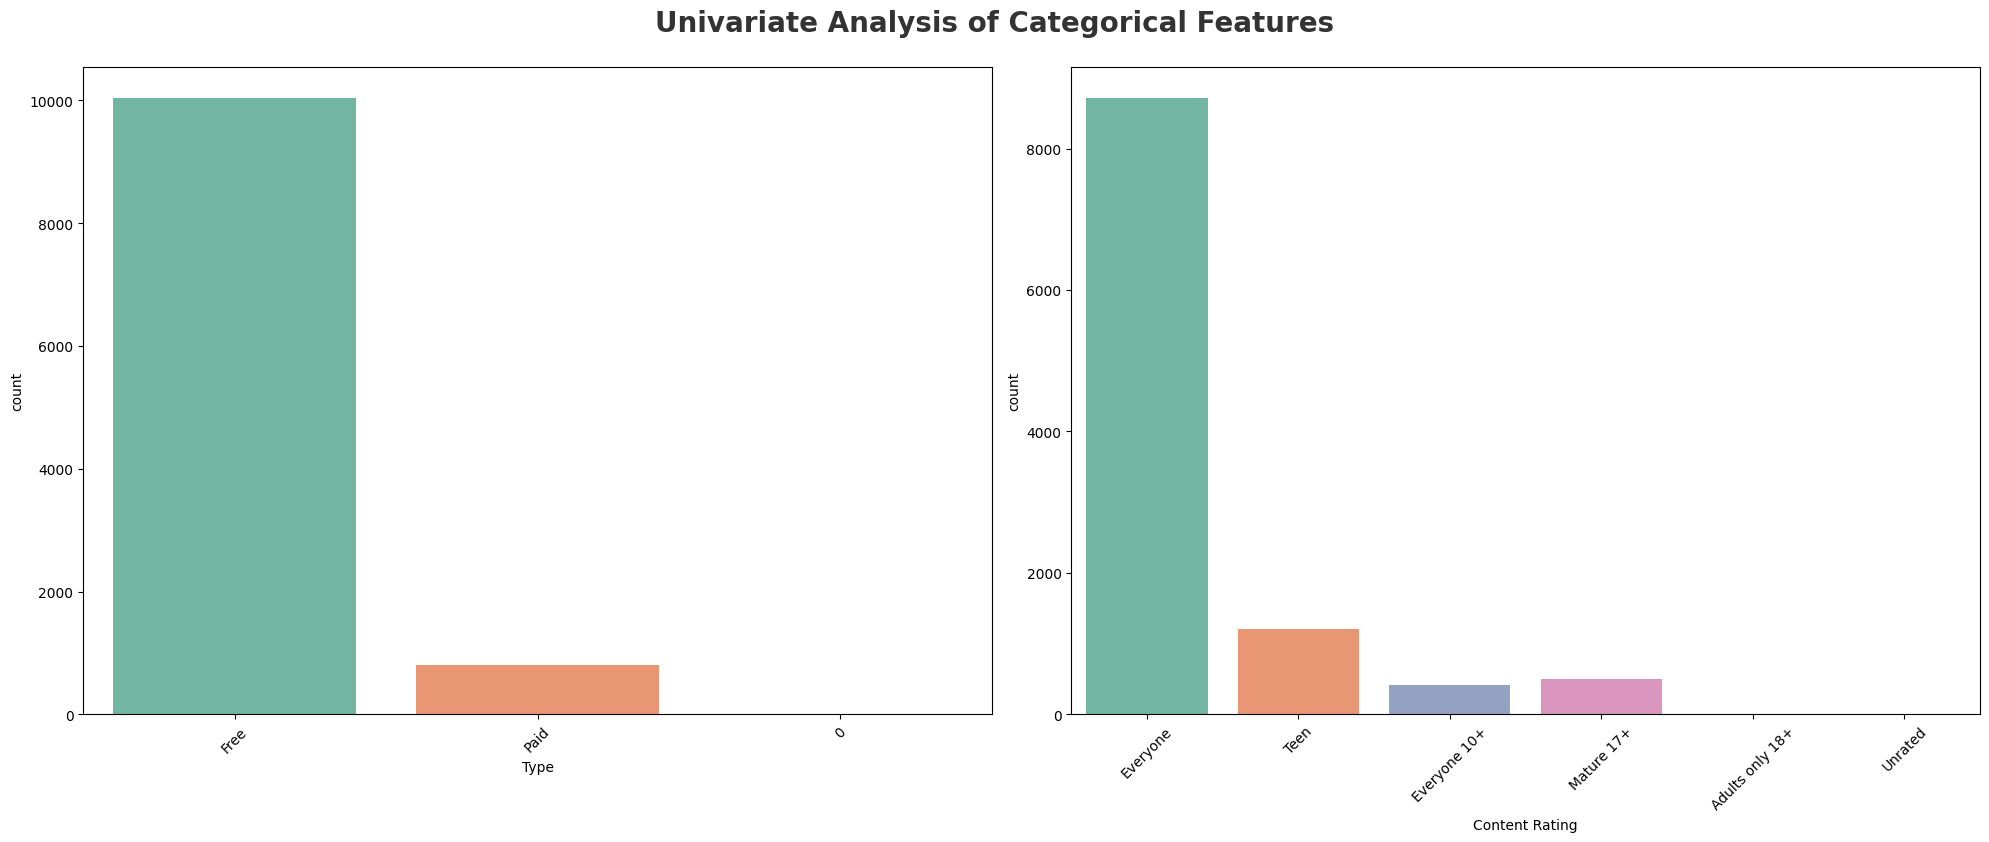

In [450]:

# categorical columns
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
category = [ 'Type', 'Content Rating']
for i in range(0, len(category)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[category[i]],palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

### Count of apps per category

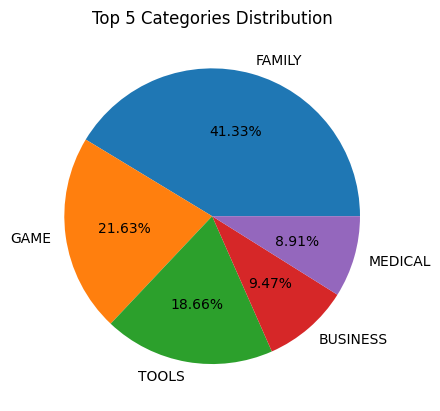

In [443]:
category_count=df_copy['Category'].value_counts().head(5)

plt.pie(category_count.values,labels=category_count.index,autopct='%1.2f%%')
plt.title("Top 5 Categories Distribution")
plt.show()

In [430]:
# top App Categories
categories=df_copy['Category'].value_counts().sort_values(ascending=False)

categories_df=pd.DataFrame(categories)
categories_df

,count
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395
PERSONALIZATION,376
PRODUCTIVITY,374
LIFESTYLE,369
FINANCE,345


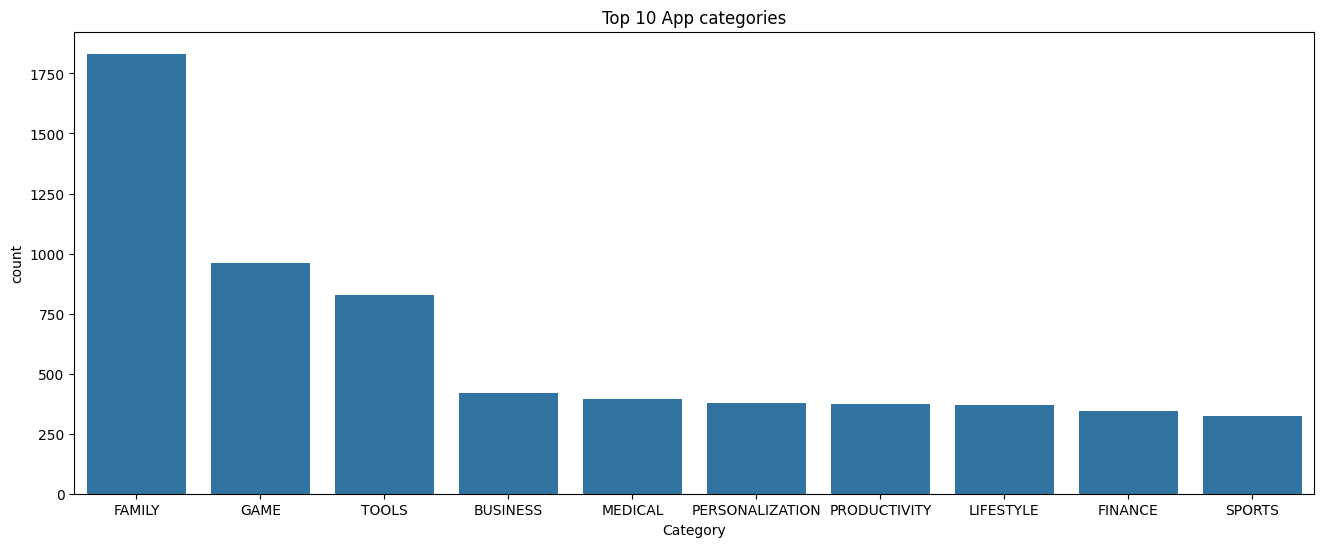

In [431]:
categories=df_copy['Category'].value_counts().sort_values(ascending=False).head(10)

plt.figure(figsize=(16,6))
categories_df=pd.DataFrame(categories)
sns.barplot(x='Category',y='count',data=categories_df)
plt.title('Top 10 App categories')
plt.show()

In [432]:
gb1=df_copy.groupby('Category')['Installs'].sum().sort_values(ascending=False).reset_index()

print("category that ha largest number of installation:")
print(gb1.iloc[0])

category that ha largest number of installation:
Category           GAME
Installs    13878924415
Name: 0, dtype: object


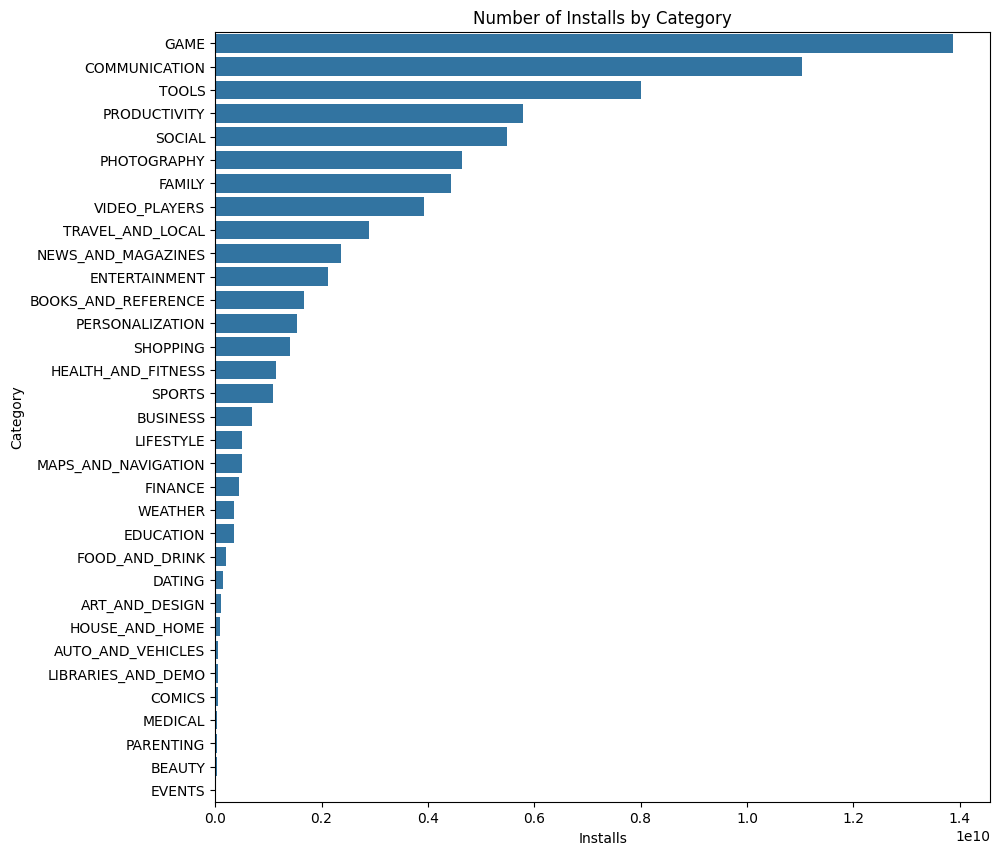

In [433]:
plt.figure(figsize=(10,10))
sns.barplot(x='Installs',y='Category',data=gb1)
plt.title("Number of Installs by Category")
plt.show()

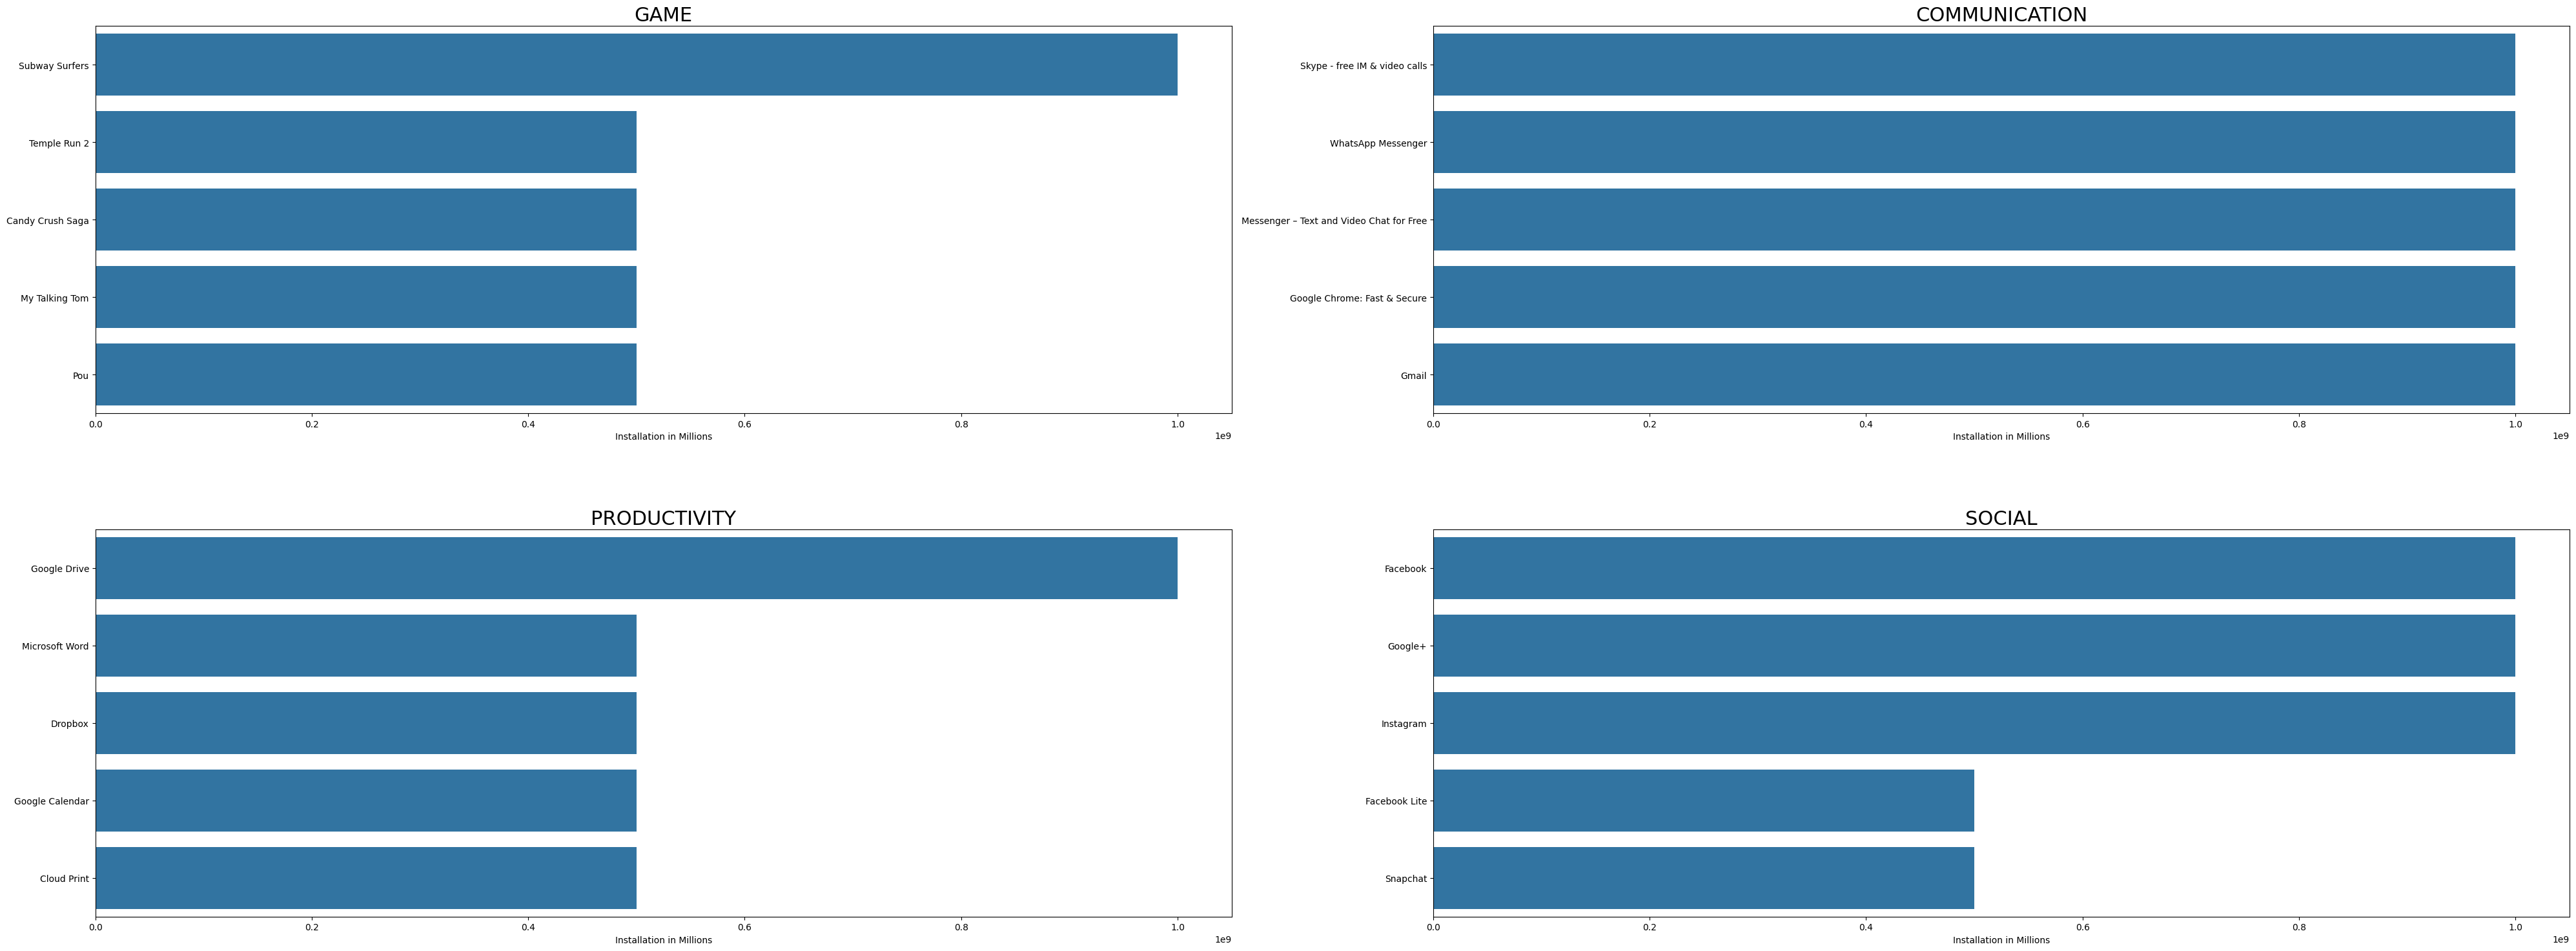

In [439]:
dfa = df_copy.groupby(['Category' ,'App'])['Installs'].sum().reset_index()
dfa = dfa.sort_values('Installs', ascending = False)
apps = ['GAME', 'COMMUNICATION', 'PRODUCTIVITY', 'SOCIAL' ]

plt.figure(figsize=(40,30))

for i,app in enumerate(apps):
    df2 = dfa[dfa.Category == app]
    df3 = df2.head(5)
    plt.subplot(4,2,i+1)
    sns.barplot(data= df3,x= 'Installs' ,y='App' )
    plt.xlabel('Installation in Millions')
    plt.ylabel('')
    plt.title(app,size = 22)
    
plt.tight_layout()
plt.subplots_adjust(hspace= .3)
plt.show()

In [435]:
gb2=df_copy.groupby('App')['Rating'].sum().sort_values(ascending=False).reset_index()

df_5star=df[df['Rating']==5.0]
print("Number of 5 rated apps:",len(df_5star))

Number of 5 rated apps: 274


In [436]:
df_5star

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37M,"1,000+",Free,0,Everyone,Comics,"June 26, 2018",2.0,4.0.3 and up
612,American Girls Mobile Numbers,DATING,5.0,5,4.4M,"1,000+",Free,0,Mature 17+,Dating,"July 17, 2018",3.0,4.0.3 and up
615,Awake Dating,DATING,5.0,2,70M,100+,Free,0,Mature 17+,Dating,"July 24, 2018",2.2.9,4.4 and up
633,Spine- The dating app,DATING,5.0,5,9.3M,500+,Free,0,Teen,Dating,"July 14, 2018",4.0,4.0.3 and up
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5.0M,100+,Free,0,Mature 17+,Dating,"August 1, 2018",8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100+,Free,0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7.9M,"1,000+",Free,0,Everyone,Lifestyle,"December 31, 2017",0.7.1,4.4 and up
10776,Monster Ride Pro,GAME,5.0,1,24M,10+,Free,0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8.6M,"1,000+",Free,0,Teen,Education,"June 27, 2018",3.8.0,4.1 and up


### Summary of Insights

- Most apps on the Play Store are free
- Certain categories dominate the app market
- Apps with higher installs tend to have better ratings
- Paid apps are generally less common than free apps
- Ratings and installs play a key role in app popularity

This EDA provides valuable insights into app performance and market trends on the Google Play Store.


In [451]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_kb,year,month,day,month_name,day_name
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,19000.0,2018,1,7,January,Sunday
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,14000.0,2018,1,15,January,Monday
